In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [15]:
df = pd.read_csv("dataset.csv")
print(len(df))

540364


In [16]:
df['date'] = pd.to_datetime(df.date)
df = df.sort_values(by='date')
def create_year_column(row):
    if row['date'].year == 2017:
        return 2017
    else:
        return 2016


df['year'] = df.apply(create_year_column, axis=1)

In [17]:
above_24_degrees = df[df['temperature'] > 23.9]
below_24_degrees = df[df['temperature'] < 23.9]

In [18]:
len(above_24_degrees)

881

## Temperature

<AxesSubplot:ylabel='temperature'>

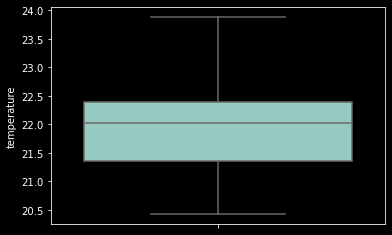

In [19]:
sns.boxplot(y="temperature", data=below_24_degrees)

<AxesSubplot:xlabel='room', ylabel='temperature'>

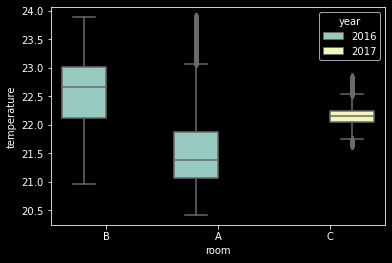

In [20]:
sns.boxplot(y="temperature", data=below_24_degrees, x="room", hue="year")

<AxesSubplot:ylabel='temperature'>

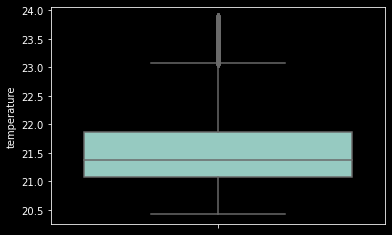

In [21]:
below_24_degrees = below_24_degrees[below_24_degrees['temperature'] < 23.9]
only_room_0 = below_24_degrees[below_24_degrees['room'] == "A"]
sns.boxplot(y="temperature", data=only_room_0)

252444


<AxesSubplot:ylabel='temperature'>

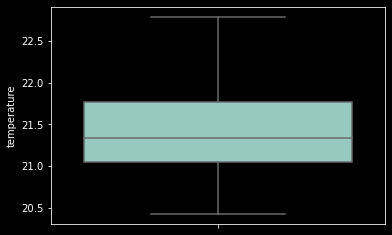

In [22]:
below_23_degrees = only_room_0[only_room_0['temperature'] < 22.8]
print(len(below_23_degrees))
sns.boxplot(y="temperature", data=below_23_degrees)

<AxesSubplot:ylabel='temperature'>

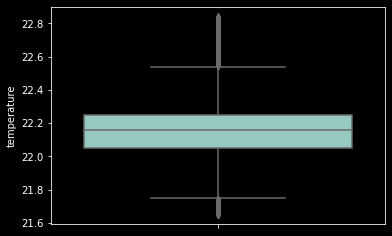

In [23]:
only_room_2 = below_24_degrees[below_24_degrees['room'] == "C"]
sns.boxplot(y="temperature", data=only_room_2)

111069


<AxesSubplot:ylabel='temperature'>

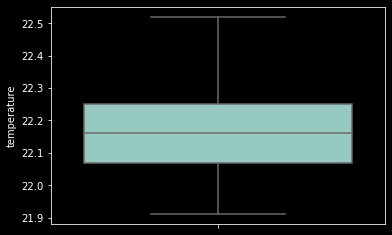

In [24]:
below_225_degrees = only_room_2[only_room_2['temperature'] < 22.53]
above = below_225_degrees[below_225_degrees['temperature'] > 21.9]
print(len(above))
sns.boxplot(y="temperature", data=above)

540364
509295


<AxesSubplot:xlabel='room', ylabel='temperature'>

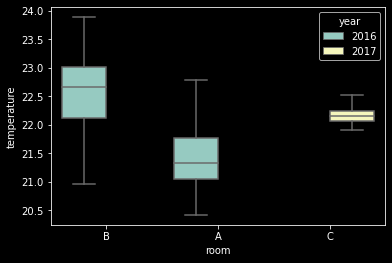

In [25]:
room0 = below_24_degrees[below_24_degrees.room == "A"]
below_23_degrees = room0[room0['temperature'] < 22.8]

room2 = below_24_degrees[below_24_degrees.room == "C"]
below_225_degrees = room2[room2['temperature'] < 22.53]
below_225_degrees = below_225_degrees[below_225_degrees['temperature'] > 21.9]

room_1_2 = below_24_degrees[below_24_degrees.room == "B"]
frames = [room_1_2, below_23_degrees, below_225_degrees]

result = pd.concat(frames)
print(len(df))
print(len(result))
sns.boxplot(y="temperature", data=result, x="room", hue="year")

<AxesSubplot:ylabel='temperature'>

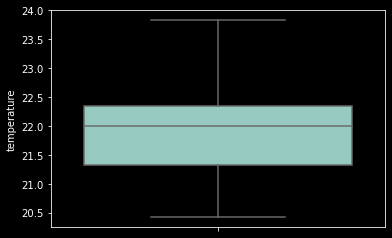

In [26]:
result = result[result['temperature'] < 23.85]
sns.boxplot(y="temperature", data=result)

## relative_humidity

<AxesSubplot:xlabel='room', ylabel='relative_humidity'>

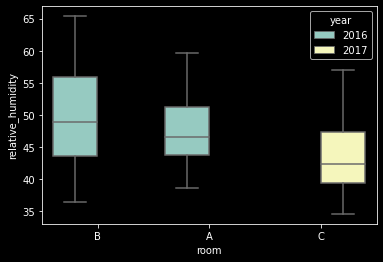

In [27]:
sns.boxplot(y="relative_humidity", data=result, x="room", hue="year")

540364
508953


<AxesSubplot:ylabel='relative_humidity'>

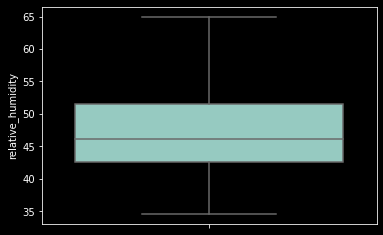

In [28]:
relative_result = result[result['relative_humidity'] < 65]
print(len(df))
print(len(relative_result))
sns.boxplot(y="relative_humidity", data=relative_result)

## mean_temp_day

540364
474472


<AxesSubplot:xlabel='mean_temp_day'>

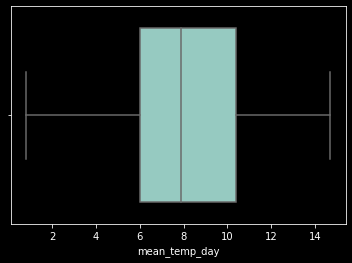

In [29]:
mean_remp_result = relative_result[relative_result['mean_temp_day'] > 0.0]
print(len(df))
print(len(mean_remp_result))
sns.boxplot(x="mean_temp_day", data=mean_remp_result)

## heatindex

540364
472864


<AxesSubplot:xlabel='heatindex'>

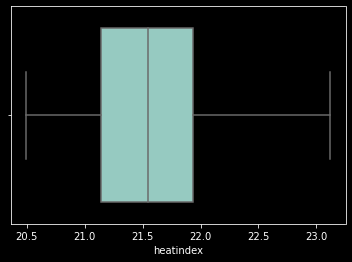

In [30]:
heat_index_result = mean_remp_result[mean_remp_result['heatindex'] < 23.12]
print(len(df))
print(len(heat_index_result))
sns.boxplot(x="heatindex", data=heat_index_result)

## light_sensor_one_wavelength

540364
439098


<AxesSubplot:xlabel='light_sensor_one_wavelength'>

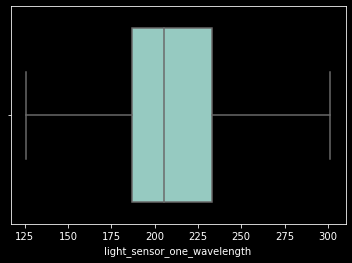

In [31]:
ligsensor_result = mean_remp_result[mean_remp_result['light_sensor_one_wavelength'] < 302]
print(len(df))
print(len(ligsensor_result))
sns.boxplot(x="light_sensor_one_wavelength", data=ligsensor_result)

## lightsensor_two_wavelength

540364
413179


<AxesSubplot:xlabel='light_sensor_two_wavelength'>

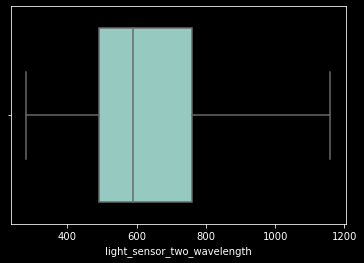

In [32]:
ligsensor_result_two = ligsensor_result[ligsensor_result['light_sensor_two_wavelength'] < 1163]
print(len(df))
print(len(ligsensor_result_two))
sns.boxplot(x="light_sensor_two_wavelength", data=ligsensor_result_two)

## number_occupants

540364
413179


<AxesSubplot:xlabel='number_occupants'>

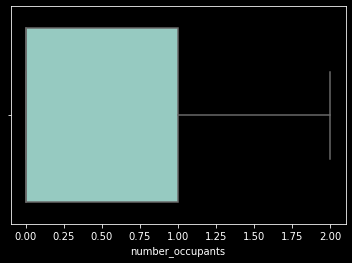

In [33]:
print(len(df))
print(len(ligsensor_result_two))
sns.boxplot(x="number_occupants", data=ligsensor_result_two)

## activity_occupants

540364
413179


<AxesSubplot:xlabel='activity_occupants'>

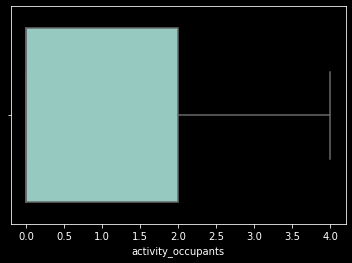

In [34]:
print(len(df))
print(len(ligsensor_result_two))
sns.boxplot(x="activity_occupants", data=ligsensor_result_two)

<AxesSubplot:xlabel='light_sensor_two_wavelength'>

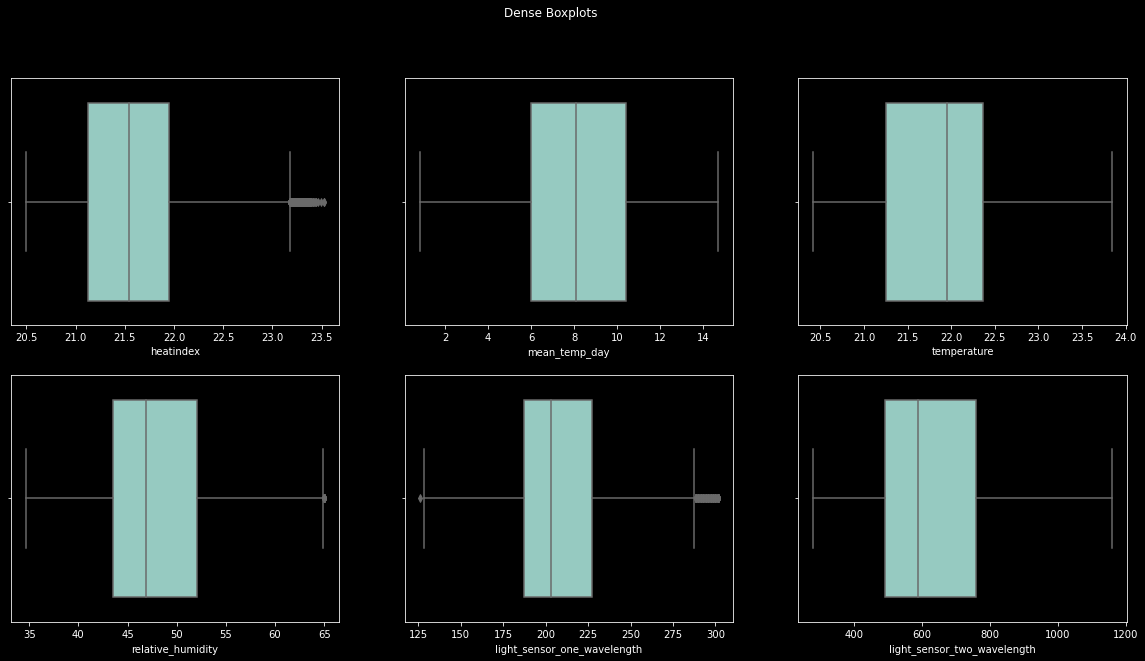

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Dense Boxplots')
sns.boxplot(ax=axes[0,0],x="heatindex", data=ligsensor_result_two)
sns.boxplot(ax=axes[0,1],x="mean_temp_day", data=ligsensor_result_two)
sns.boxplot(ax=axes[0,2],x="temperature", data=ligsensor_result_two)
sns.boxplot(ax=axes[1,0],x="relative_humidity", data=ligsensor_result_two)
sns.boxplot(ax=axes[1,1],x="light_sensor_one_wavelength", data=ligsensor_result_two)
sns.boxplot(ax=axes[1,2],x="light_sensor_two_wavelength", data=ligsensor_result_two)